# Relationship between Healthcare Access versus Confirmed Cases and Deaths.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
sb.set()

In [3]:
# Helper Functions
# Removing Outliers
def removeOutliers(df): 
    temp = pd.DataFrame() 
    for var in df: 
        Q1 = df[var].quantile(0.25) 
        Q3 = df[var].quantile(0.75) 
        IQR = Q3 - Q1 
        temp[var] = df[var][((df[var] > (Q1 - 1.5 * IQR)) & (df[var] < (Q3 + 1.5 * IQR)))] 
        temp = temp.dropna()
    return temp

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
usacovid = pd.read_csv('county_megaset.csv')
usacovid['Death to Case Ratio'] = pd.DataFrame(usacovid['Deaths']/usacovid['Confirmed'])
usacovid.head()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Name,State,Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,...,Confirmed,Deaths,Death to Case Ratio,Total population without healthcare access,Total Healthcare-related workers,Case Incidence (Per 100000),Death density (Per 100000),Death Rate (%),Total Population.1,Percentage of Healthcare related workers
0,161526,1001,1.539602e+09,25706961,Autauga County,Alabama,2.59,0.05,2.59,0.07,...,932,20,0.021459,3856,2013,1688.405797,36.231884,2.145923,55200,0.036467
1,161527,1003,4.117547e+09,1133055836,Baldwin County,Alabama,2.61,0.04,2.66,0.06,...,2727,17,0.006234,18679,8722,1310.383601,8.168875,0.623396,208107,0.041911
2,161528,1005,2.292145e+09,50538698,Barbour County,Alabama,2.49,0.07,2.44,0.11,...,529,4,0.007561,2544,500,2051.819099,15.514700,0.756144,25782,0.019393
3,161529,1007,1.612167e+09,9602089,Bibb County,Alabama,2.99,0.14,3.05,0.18,...,327,2,0.006116,2201,610,1451.591424,8.878235,0.611621,22527,0.027079
4,161530,1009,1.670104e+09,15015423,Blount County,Alabama,2.77,0.05,2.85,0.07,...,601,1,0.001664,6159,2402,1042.588256,1.734756,0.166389,57645,0.041669


In [5]:
usacovid.describe()

,COUNTYNS,Geographic Identifier - FIPS Code,Area of Land (square meters),Area of Water (square meters),Average Household Size,Average Household Size - Margin of Error,Average Household Size of Owner-Occupied Unit,Average Household Size of Owner-Occupied Unit - Margin of Error,Average Household Size of Renter-Occupied Unit,Average Household Size of Renter-Occupied Unit - Margin of Error,...,Confirmed,Deaths,Death to Case Ratio,Total population without healthcare access,Total Healthcare-related workers,Case Incidence (Per 100000),Death density (Per 100000),Death Rate (%),Total Population.1,Percentage of Healthcare related workers
count,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3219.000000,3219.000000,3220.000000,3220.000000,...,3220.000000,3220.00000,3159.000000,3220.000000,3220.000000,3220.000000,3220.000000,3159.000000,3.220000e+03,3220.000000
mean,9.628897e+05,31393.605280,2.844093e+09,2.143251e+08,2.529093,0.081494,2.563088,0.102336,2.444950,0.202314,...,1316.137578,45.27764,0.021551,8839.888199,4496.219876,878.110783,21.572191,2.155149,1.013323e+05,0.040779
std,5.174236e+05,16292.078954,9.255389e+09,1.220804e+09,0.279374,0.067781,0.274885,0.079810,0.393263,0.182878,...,6962.304363,456.31641,0.028900,35466.447087,14234.696765,983.144191,43.779483,2.890047,3.260964e+05,0.011618
min,2.390100e+04,1001.000000,5.300265e+06,0.000000e+00,1.340000,0.010000,1.790000,0.010000,1.360000,0.010000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+01,0.000000
25%,4.849888e+05,19032.500000,1.085268e+09,7.009854e+06,2.350000,0.040000,2.400000,0.050000,2.200000,0.100000,...,43.000000,0.00000,0.000000,923.750000,414.750000,274.108881,0.000000,0.000000,1.121425e+04,0.033565
50%,9.741585e+05,30024.000000,1.565689e+09,1.938601e+07,2.490000,0.070000,2.520000,0.090000,2.400000,0.170000,...,158.000000,2.00000,0.012367,2259.500000,1026.500000,565.918482,7.877843,1.236749,2.595050e+04,0.041086
75%,1.419973e+06,46105.500000,2.368884e+09,6.069241e+07,2.650000,0.100000,2.690000,0.130000,2.640000,0.250000,...,585.000000,13.00000,0.029668,5625.500000,2936.000000,1165.665050,25.783948,2.966814,6.655225e+04,0.048482
max,2.516404e+06,72153.000000,3.770000e+11,2.599228e+10,4.970000,1.140000,4.880000,1.460000,6.810000,5.490000,...,224051.000000,23500.00000,0.285714,965181.000000,420757.000000,16306.278070,1439.527590,28.571429,1.009805e+07,0.118237


In merging all data sets, we now have over 300 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using healthcare access and their associated parameters as predictors for covid cases, covid related deaths, and finally the death-to-case ratio. 

The predictor variable of choice in this portion will be:

> Total population without healthcare access

> Percent of Population with No Health Insurance Coverage

Our belief is that the number of civilians without healthcare access and the number of population with no health insurance coverage will affect the spread of Covid-19 as the more the civilians without healthcare access and with no health insurance coverage would mean that they are more prone to the virus.

In [6]:
usacovid_occuphealth = usacovid[[ 'Total population without healthcare access', 'Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]

## Bi-Variate Analysis: Total population without healthcare access and Percent of Population with No Health Insurance Coverage as a Predictor Variable

In [7]:
usacovid_health = usacovid_occuphealth[['Total population without healthcare access','Percent of Population with No Health Insurance Coverage', 'Confirmed', 'Deaths', 'Death to Case Ratio', 'Case Incidence (Per 100000)']]
usacovid_health.head()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,3856,7.1,932,20,0.021459,1688.405797
1,18679,8.9,2727,17,0.006234,1310.383601
2,2544,11.3,529,4,0.007561,2051.819099
3,2201,10.7,327,2,0.006116,1451.591424
4,6159,10.8,601,1,0.001664,1042.588256


In [8]:
usacovid_health.describe()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,3220.000000,3220.000000,3220.000000,3220.00000,3159.000000,3220.000000
mean,8839.888199,9.549627,1316.137578,45.27764,0.021551,878.110783
std,35466.447087,5.086483,6962.304363,456.31641,0.028900,983.144191
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,923.750000,5.700000,43.000000,0.00000,0.000000,274.108881
50%,2259.500000,8.600000,158.000000,2.00000,0.012367,565.918482
75%,5625.500000,12.000000,585.000000,13.00000,0.029668,1165.665050
max,965181.000000,46.300000,224051.000000,23500.00000,0.285714,16306.278070


<AxesSubplot:>

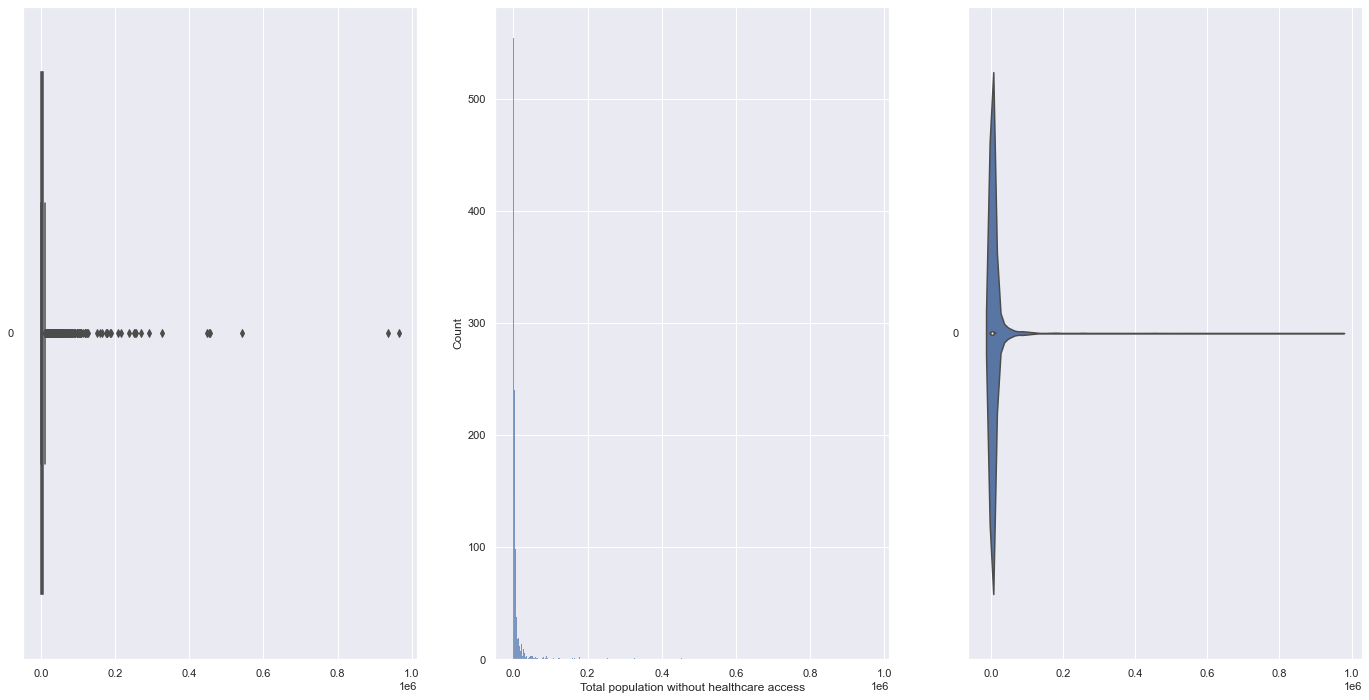

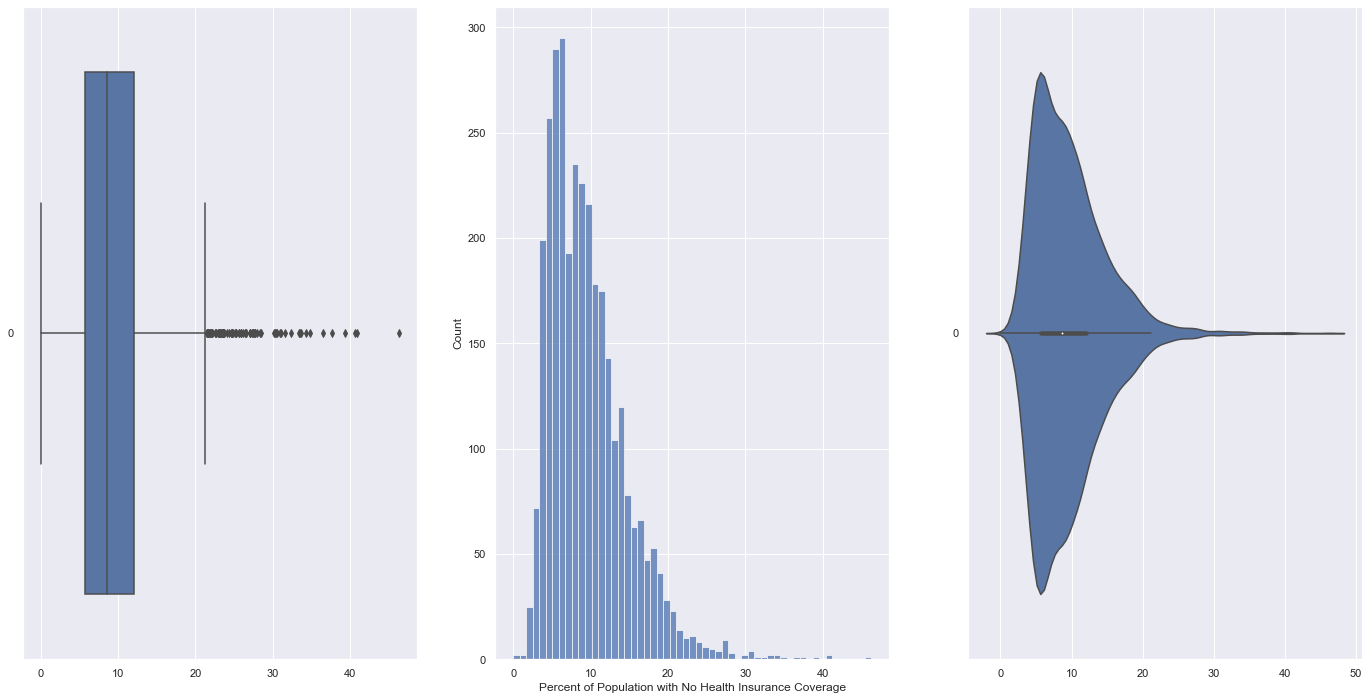

In [9]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health['Total population without healthcare access'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health['Total population without healthcare access'], ax = axes[1])
sb.violinplot(data = usacovid_health['Total population without healthcare access'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [10]:
usacovid_health['Total population without healthcare access'].skew()

16.03835285096273

In [11]:
usacovid_health['Percent of Population with No Health Insurance Coverage'].skew()

1.5032765069451965

We can see that the predictor Total population without healthcare access is very HEAVILY right skewed with a skewness of 16.04, similar to the previous predictor variable using Occupation. We do see an interesting skewness of the Percent of Population with No Health Insurance Coverage, but it is mostly because it is a percentage instead of the exact number. Let us continue and analyse them more.

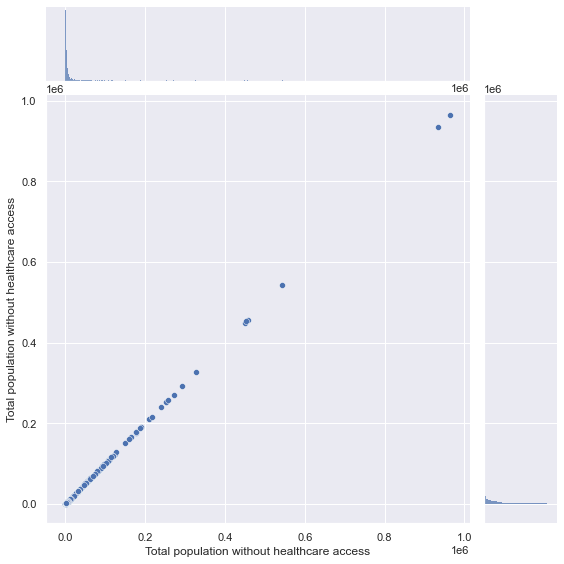

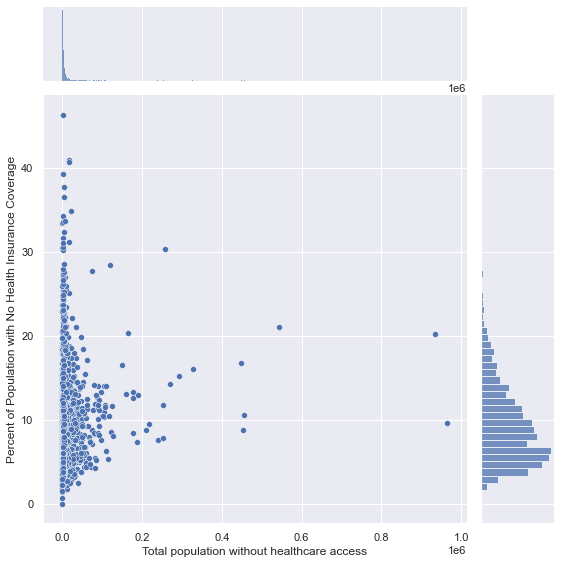

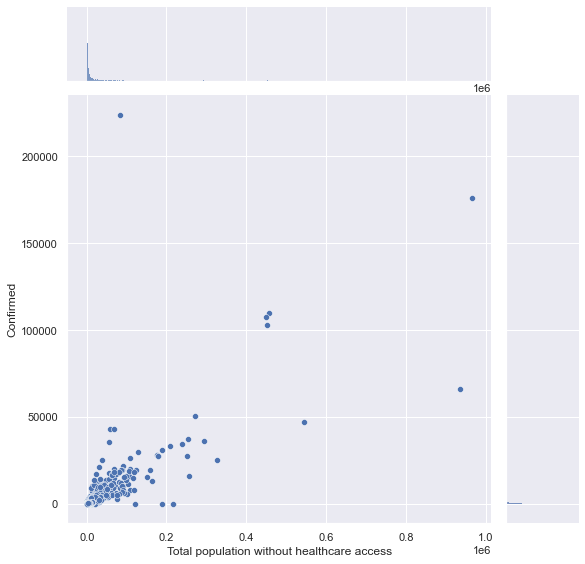

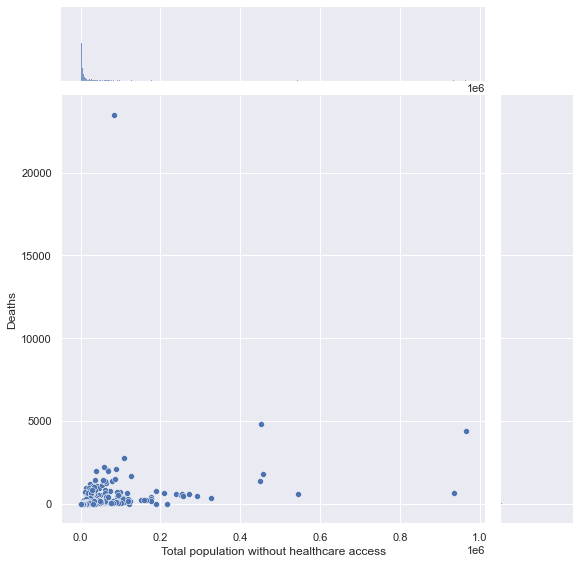

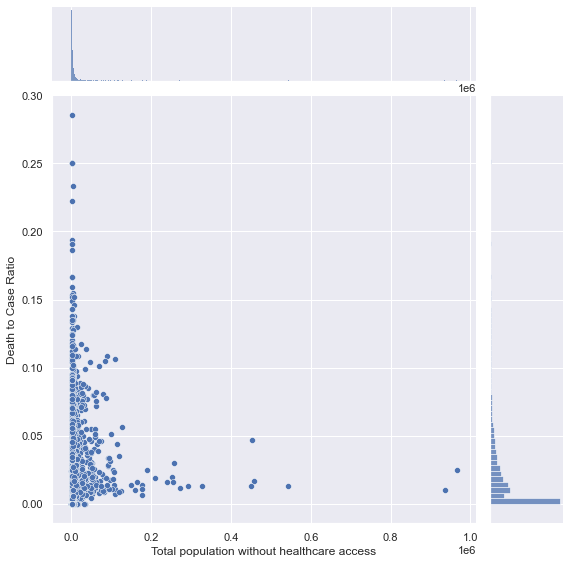

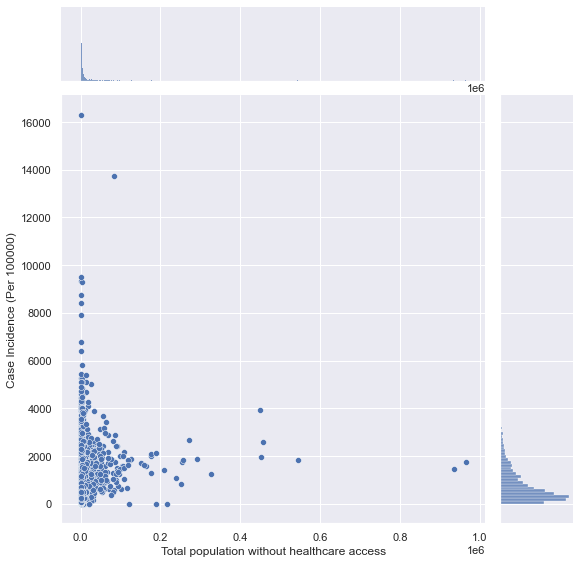

In [12]:
for var in usacovid_health:
    sb.jointplot(data = usacovid_health, x = "Total population without healthcare access", y = var, height = 8)

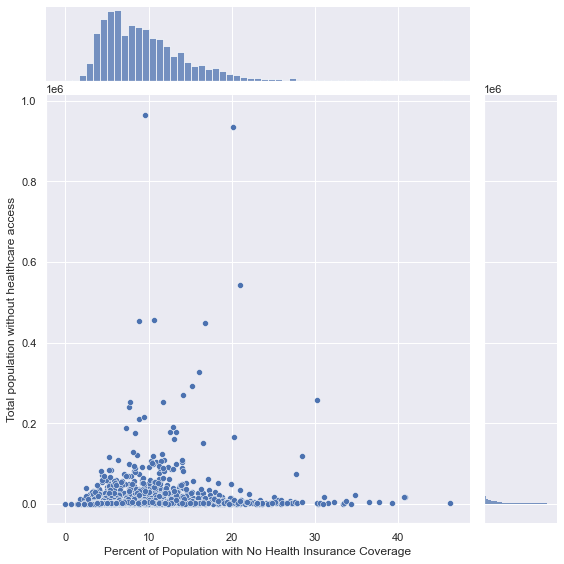

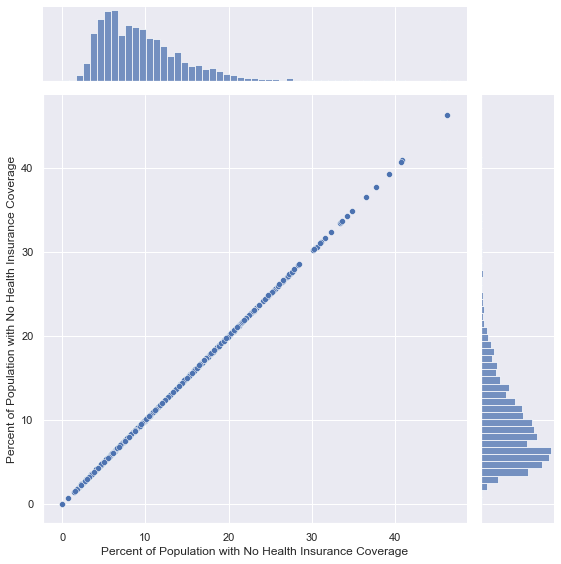

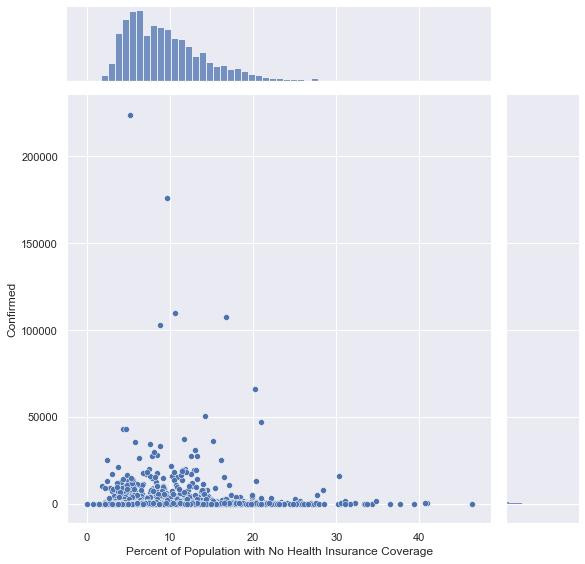

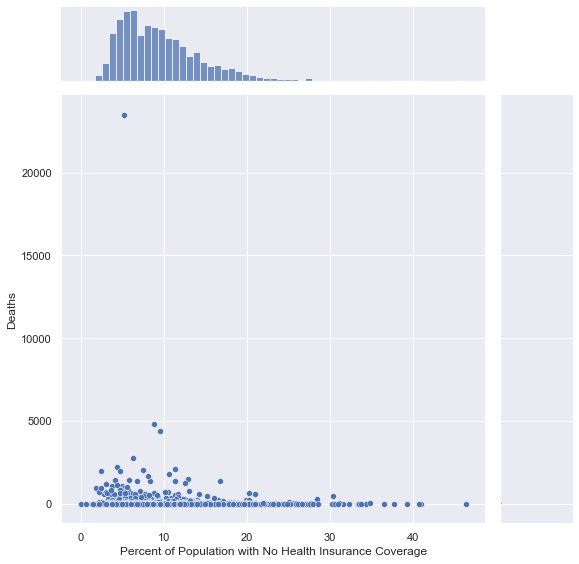

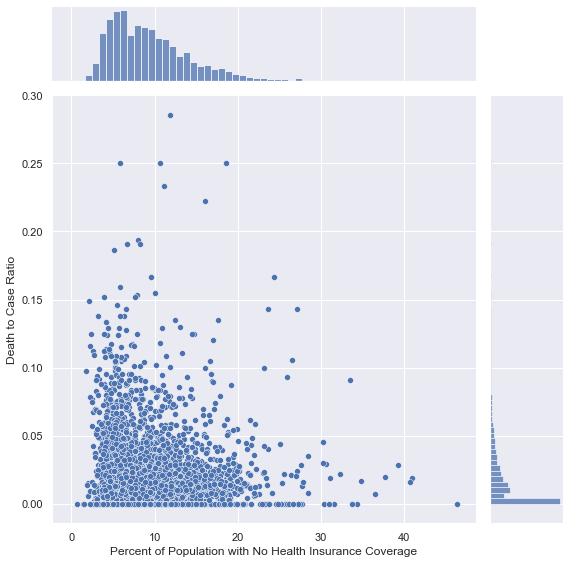

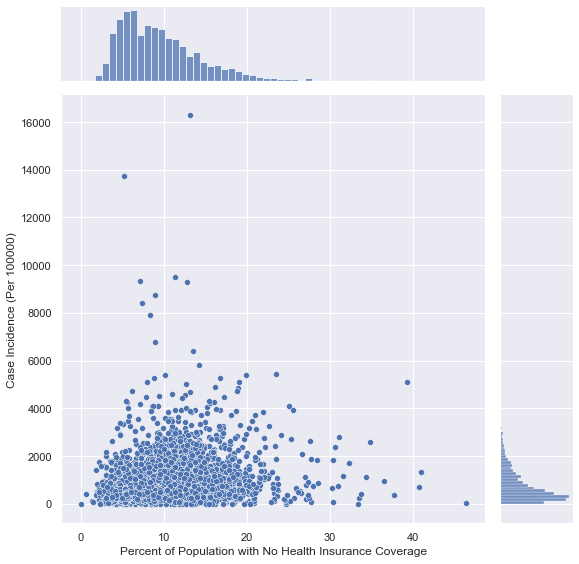

In [13]:
for var in usacovid_health:
    sb.jointplot(data = usacovid_health, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [14]:
usacovid_health.corr()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Total population without healthcare access,1.000000,0.071680,0.749709,0.292921,0.030366,0.137097
Percent of Population with No Health Insurance Coverage,0.071680,1.000000,0.002245,-0.035030,-0.059378,0.246788
Confirmed,0.749709,0.002245,1.000000,0.794622,0.084918,0.296615
Deaths,0.292921,-0.035030,0.794622,1.000000,0.135629,0.284435
Death to Case Ratio,0.030366,-0.059378,0.084918,0.135629,1.000000,0.094840
Case Incidence (Per 100000),0.137097,0.246788,0.296615,0.284435,0.094840,1.000000


<AxesSubplot:>

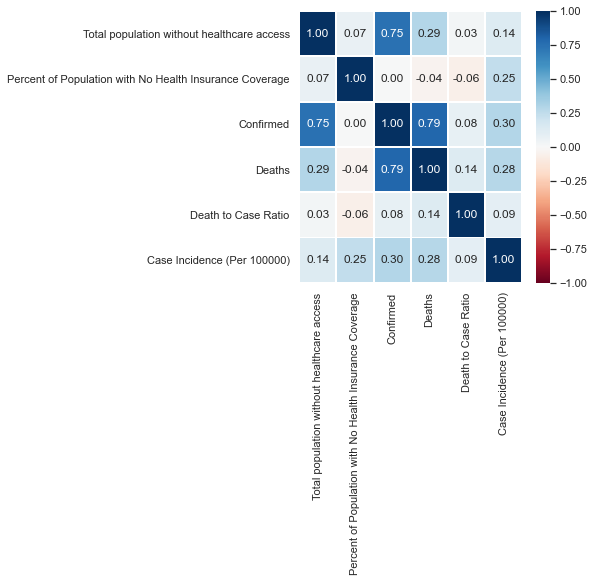

In [15]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

There is fairly high relationship between the Total population without healthcare access and the response variable Confirmed cases, however we also note that there is relatively high relationship between Percent of Population with No Health Insurance Coverage and Case Incidence, compared to the previous Occupation predictors where there is practically no linear correlation between the Occupation predictors and the response variables. Let us remove the outliers to see if there is any changes. 

In [16]:
usacovid_health_clean = pd.DataFrame(removeOutliers(usacovid_health))
usacovid_health_clean.head()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
0,3856,7.1,932.0,20.0,0.021459,1688.405797
2,2544,11.3,529.0,4.0,0.007561,2051.819099
3,2201,10.7,327.0,2.0,0.006116,1451.591424
4,6159,10.8,601.0,1.0,0.001664,1042.588256
7,10737,9.5,1157.0,6.0,0.005186,1005.230325


In [17]:
usacovid_health_clean.describe()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2525.410480,8.997118,197.575109,3.469432,0.013876,620.724838
std,2416.957656,4.220234,244.448659,5.861976,0.017138,527.597532
min,5.000000,0.700000,1.000000,0.000000,0.000000,17.765145
25%,752.250000,5.600000,35.000000,0.000000,0.000000,244.392343
50%,1745.000000,8.300000,101.500000,1.000000,0.008147,438.118114
75%,3431.000000,11.500000,265.750000,4.000000,0.022727,835.997844
max,12287.000000,21.200000,1386.000000,32.000000,0.074074,2480.875098


<AxesSubplot:>

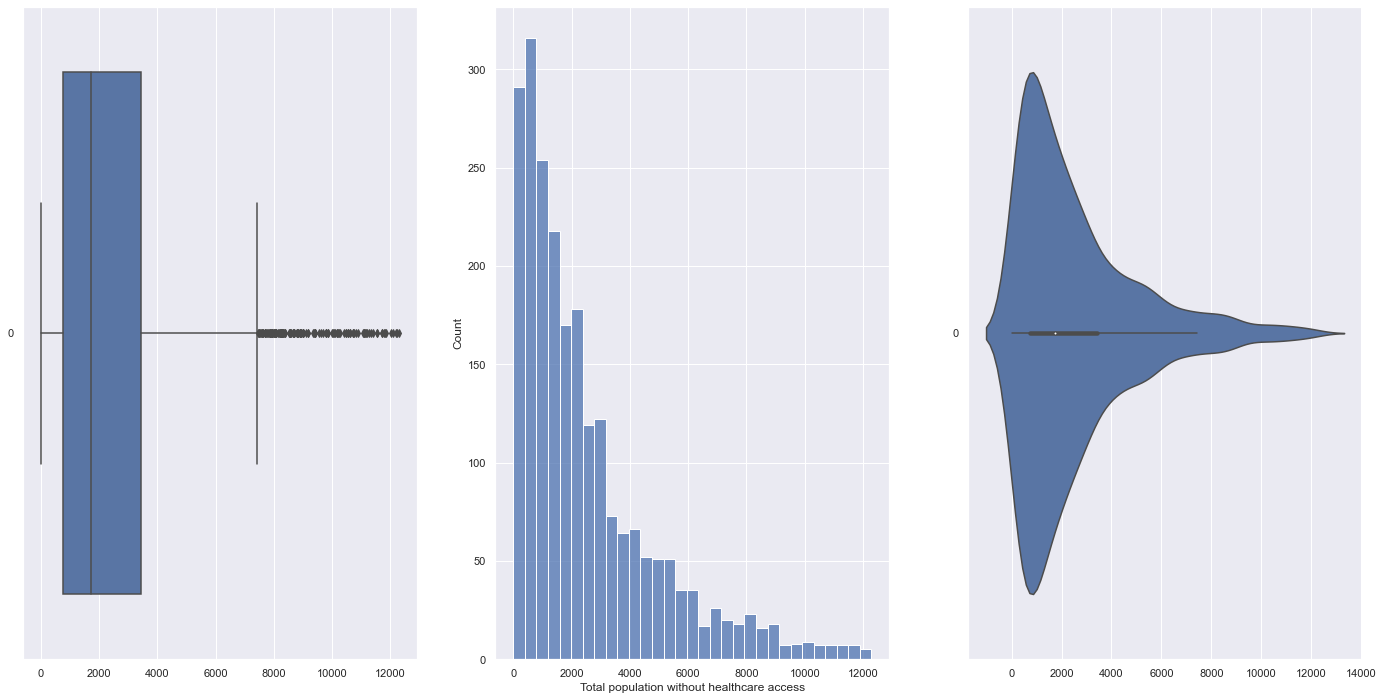

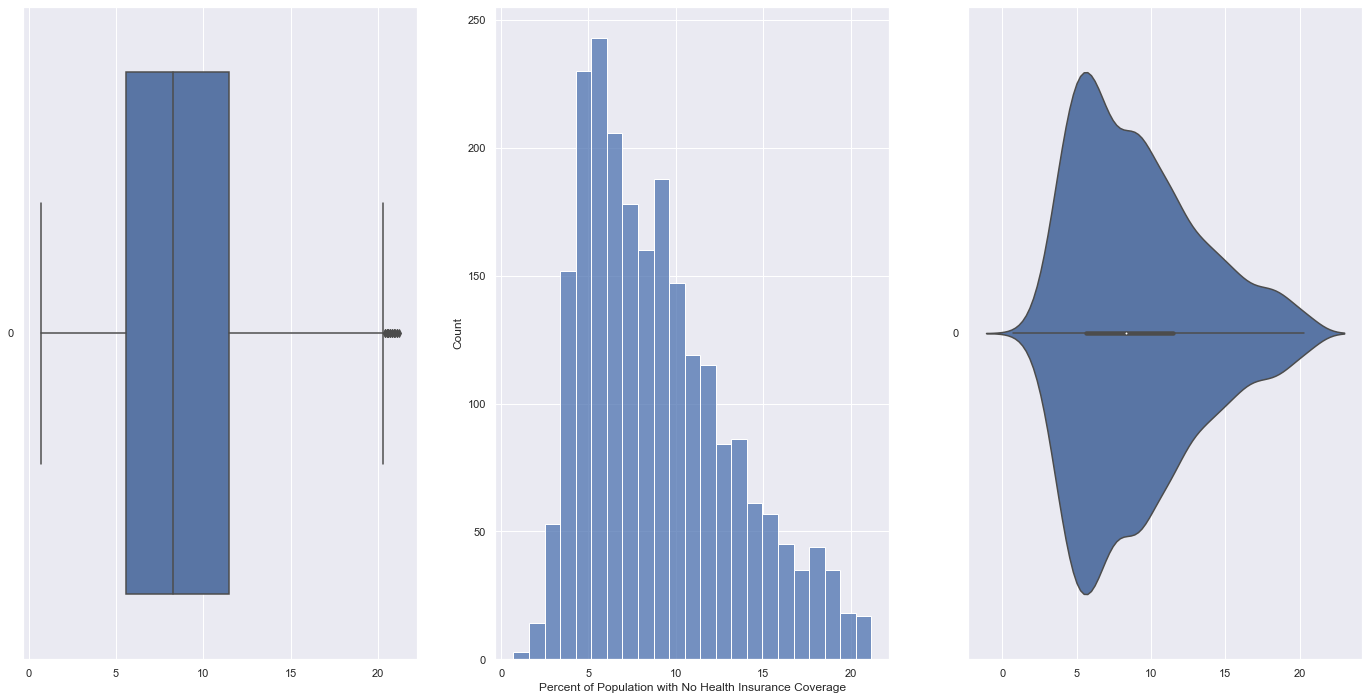

In [18]:
f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health_clean['Total population without healthcare access'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health_clean['Total population without healthcare access'], ax = axes[1])
sb.violinplot(data = usacovid_health_clean['Total population without healthcare access'], orient = "h", ax = axes[2])

f, axes = plt.subplots(1, 3, figsize=(24, 12))

sb.boxplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[0])
sb.histplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], ax = axes[1])
sb.violinplot(data = usacovid_health_clean['Percent of Population with No Health Insurance Coverage'], orient = "h", ax = axes[2])

In [19]:
usacovid_health_clean['Total population without healthcare access'].skew()

1.556859682077678

In [20]:
usacovid_health_clean['Percent of Population with No Health Insurance Coverage'].skew()

0.742224710068184

With outliers removed, it is clearly seen that the skewness of the predictor Total population without healthcare access is not that MASSIVELY skewed, but it is still relatively heavily right skewed with a skewness of 1.56, while the skewness of the predictor Percent of Population with No Health Insurance Coverage is halved to 0.74. Let us carry on to the analysis and maybe we can acquire some fruitful insight. 

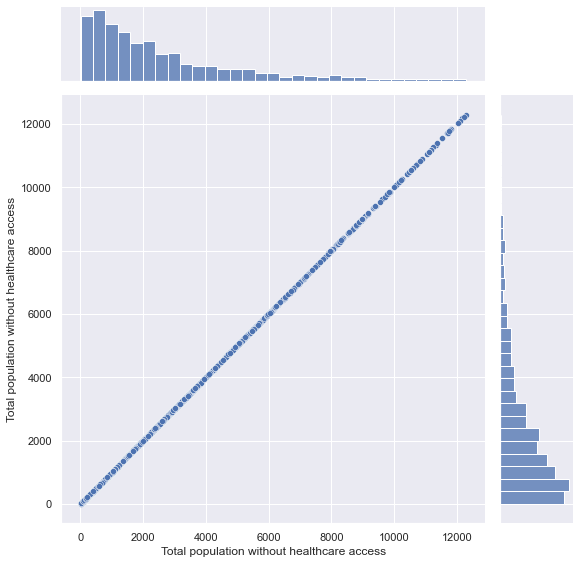

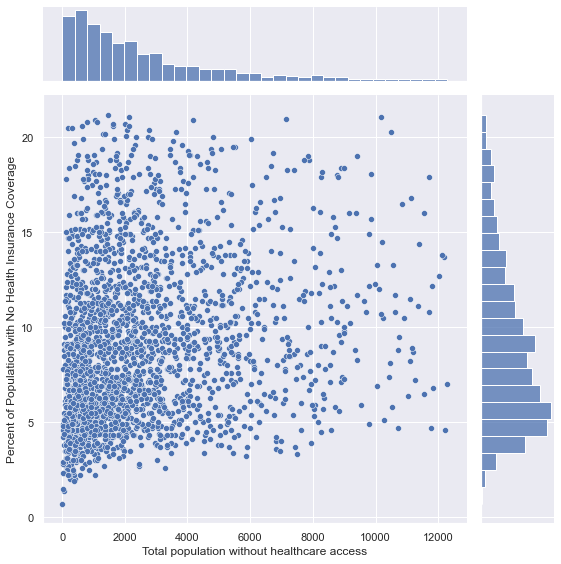

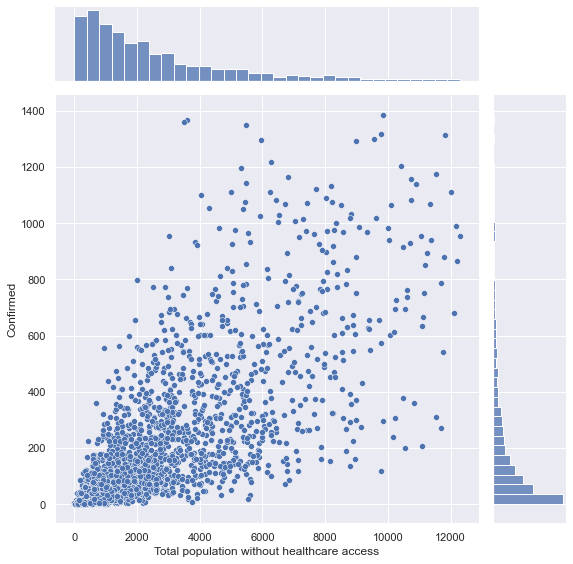

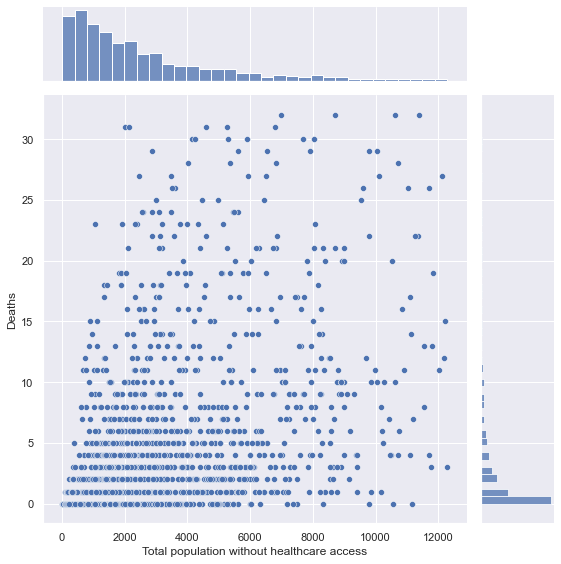

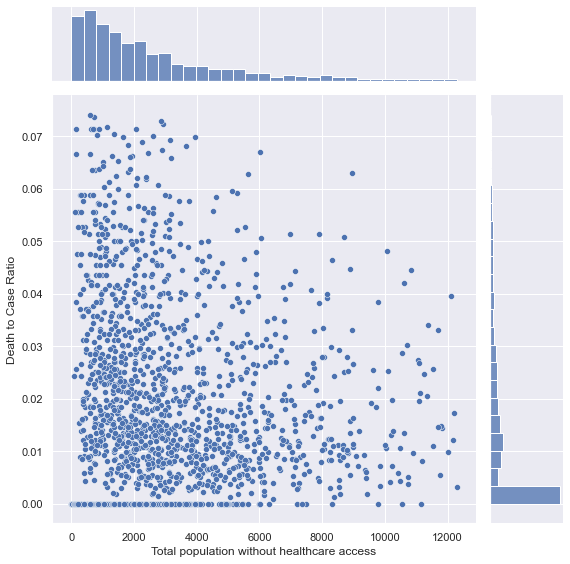

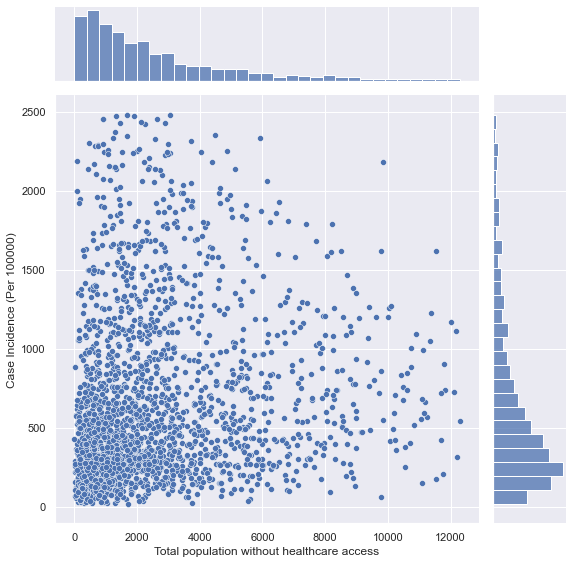

In [21]:
for var in usacovid_health_clean:
    sb.jointplot(data = usacovid_health_clean, x = "Total population without healthcare access", y = var, height = 8)

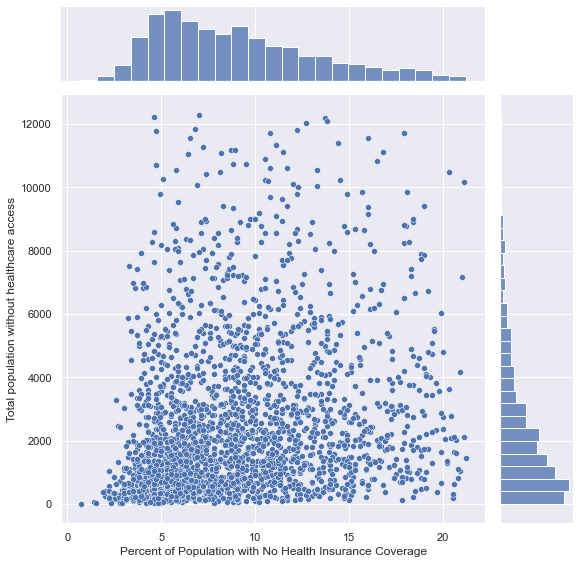

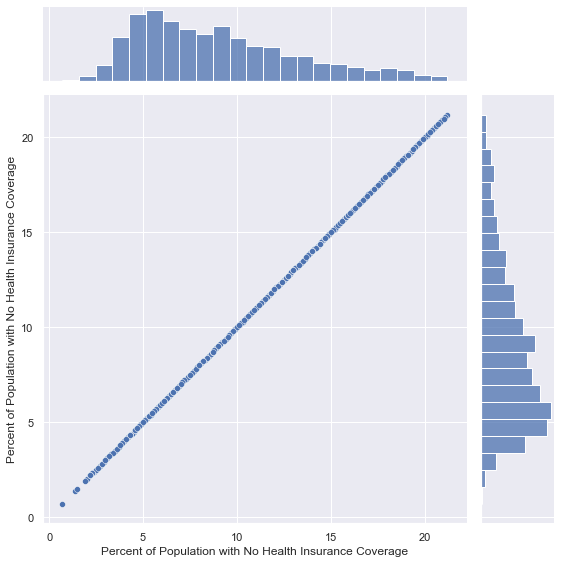

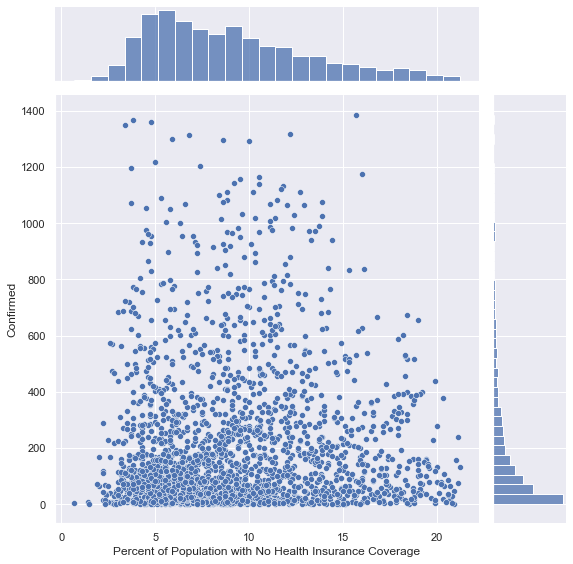

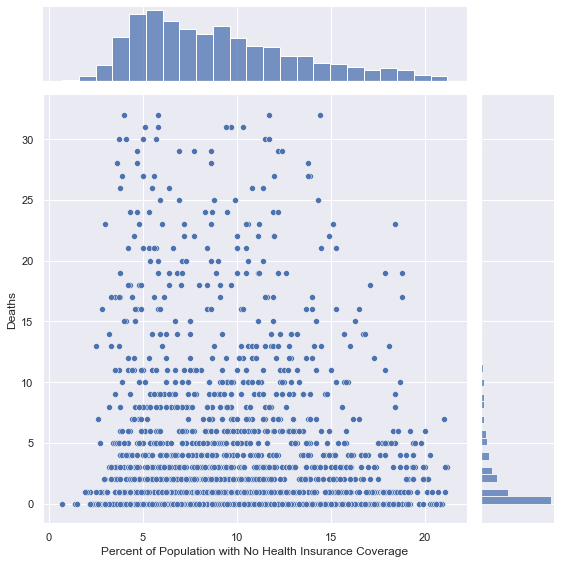

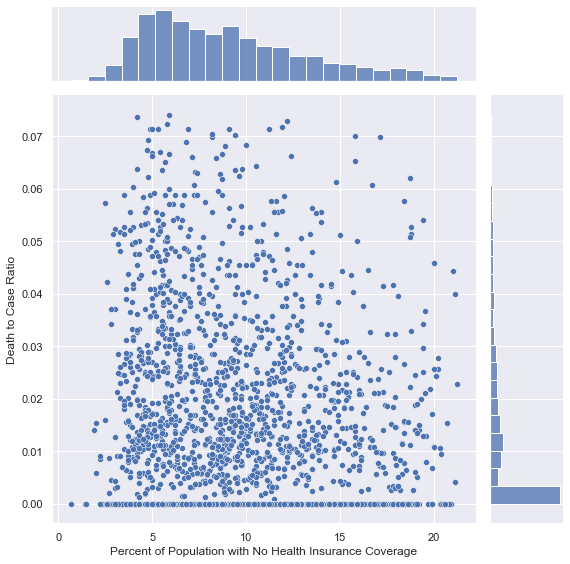

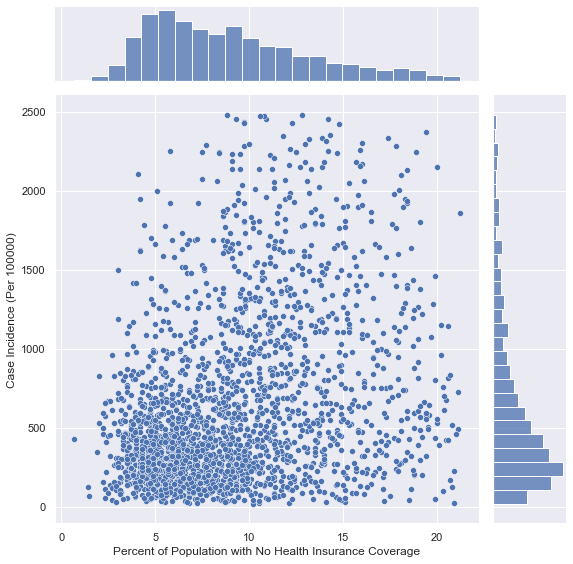

In [22]:
for var in usacovid_health_clean:
    sb.jointplot(data = usacovid_health_clean, x = "Percent of Population with No Health Insurance Coverage", y = var, height = 8)

In [23]:
usacovid_health_clean.corr()

,Total population without healthcare access,Percent of Population with No Health Insurance Coverage,Confirmed,Deaths,Death to Case Ratio,Case Incidence (Per 100000)
Total population without healthcare access,1.000000,0.223736,0.739274,0.513701,0.159307,0.180063
Percent of Population with No Health Insurance Coverage,0.223736,1.000000,0.061601,0.033041,0.010225,0.327620
Confirmed,0.739274,0.061601,1.000000,0.705669,0.173844,0.564107
Deaths,0.513701,0.033041,0.705669,1.000000,0.587195,0.447863
Death to Case Ratio,0.159307,0.010225,0.173844,0.587195,1.000000,0.212505
Case Incidence (Per 100000),0.180063,0.327620,0.564107,0.447863,0.212505,1.000000


<AxesSubplot:>

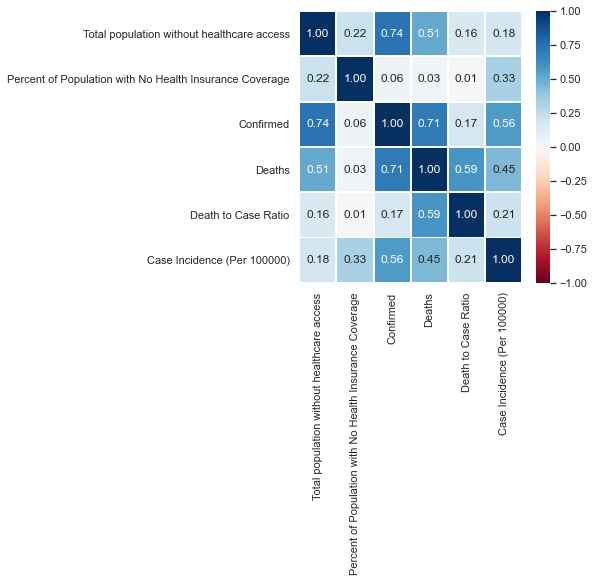

In [24]:
f = plt.figure(figsize=(5, 5))
sb.heatmap(usacovid_health_clean.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12}, cmap = "RdBu")

Now this is surprising. Instead of the expected dip in the correlation, we see the opposite happening on both of the predictor variables against Deaths and Case Incidence. The relatively good correlation between Percent of Population with No Health Insurance Coverage and Case Incidence is a very important part here, because it really shows that the health insurance coverage will affect the Covid-19 cases.